In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Final_Frame.csv', index_col='Unnamed: 0')

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.review_time.dtype

dtype('int64')

In [6]:
df[ 'review_time' ] = pd.to_datetime(df[ 'review_time' ], unit = 's' )

In [7]:
df

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,name,abv,ibu,id,style,ounces
0,Caldera Brewing Company,2009-08-26 23:01:17,4.0,3.5,3.5,NJpadreFan,4.0,4.0,Caldera Pale Ale,0.056,55.0,1419,American Pale Ale (APA),12.0
1,Caldera Brewing Company,2009-08-22 08:15:02,2.5,3.0,3.5,vacax,3.5,2.5,Caldera Pale Ale,0.056,55.0,1419,American Pale Ale (APA),12.0
2,Caldera Brewing Company,2009-08-10 01:03:28,4.0,3.5,4.0,d0ggnate,4.0,3.5,Caldera Pale Ale,0.056,55.0,1419,American Pale Ale (APA),12.0
3,Caldera Brewing Company,2009-08-09 19:45:21,4.5,3.5,4.0,babyhobbes,3.5,4.0,Caldera Pale Ale,0.056,55.0,1419,American Pale Ale (APA),12.0
4,Caldera Brewing Company,2009-08-06 10:57:57,4.5,3.5,4.0,mdagnew,4.0,4.0,Caldera Pale Ale,0.056,55.0,1419,American Pale Ale (APA),12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99319,Southern Star Brewing Company,2012-01-08 01:07:49,4.0,4.0,4.0,TenHornsProud,4.0,4.0,Le Mort Vivant,0.069,23.0,1740,Bière de Garde,12.0
99320,Southern Star Brewing Company,2012-01-06 01:13:08,3.5,3.5,3.5,twiggamortis420,4.5,3.5,Le Mort Vivant,0.069,23.0,1740,Bière de Garde,12.0
99321,Southern Star Brewing Company,2011-12-30 22:53:59,4.0,3.5,4.0,Mora2000,4.0,3.5,Le Mort Vivant,0.069,23.0,1740,Bière de Garde,12.0
99322,Southern Star Brewing Company,2011-12-19 23:24:46,4.5,4.0,4.5,HopsKeepDroppin,4.5,4.0,Le Mort Vivant,0.069,23.0,1740,Bière de Garde,12.0


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


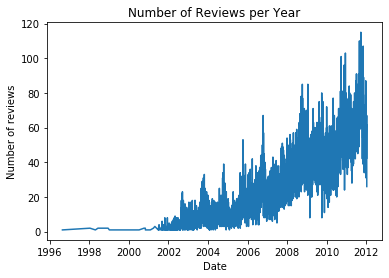

In [8]:
group_by_date = df[[ 'review_time' ]].groupby(df['review_time'].dt.date ).agg([ 'count' ])
plt.figure
plt.plot(group_by_date)
plt.xlabel('Date' )
plt.ylabel('Number of reviews')
plt.title('Number of Reviews per Year')
plt.show()

In [9]:
df['review_profilename' ].value_counts()

mikesgroove       269
woodychandler     240
BuckeyeNation     235
indiapaleale      194
tempest           192
                 ... 
skypilot            1
SoCaliC8            1
kripke              1
imaregularjoe       1
Brewsteraddict      1
Name: review_profilename, Length: 10868, dtype: int64

In [10]:
# Count of unique users
print( 'Unique users:', df[ 'review_profilename' ].nunique() )
print( 'Unique users with more than 1 review:', df[ 'review_profilename' ].value_counts()[df[ 'review_profilename' ].value_counts() > 1 ].shape[ 0 ], '-' , str( round(df[ 'review_profilename' ].value_counts()[df['review_profilename'].value_counts() > 1 ].shape[ 0 ] / df[ 'review_profilename' ].nunique(), 2 ) * 100 ) + '%' )

Unique users: 10868
Unique users with more than 1 review: 7710 - 71.0%


In [11]:
beers_df = df[[ 'name', 'brewery_name', 'style', 'abv', 'ibu', 'ounces' ]].drop_duplicates()

In [12]:
beers_df

,name,brewery_name,style,abv,ibu,ounces
0,Caldera Pale Ale,Caldera Brewing Company,American Pale Ale (APA),0.056,55.0,12.0
163,Pilot Rock Porter,Caldera Brewing Company,American Porter,0.060,0.0,12.0
172,Caldera IPA,Caldera Brewing Company,American IPA,0.061,94.0,12.0
553,Lawnmower Lager,Caldera Brewing Company,American Adjunct Lager,0.039,16.0,12.0
567,Lawnmower Lager,Ellersick Brewing Company,American Adjunct Lager,0.039,16.0,12.0
...,...,...,...,...,...,...
98253,Cow Creek,Twisted X Brewing Company,American Amber / Red Lager,0.054,26.0,12.0
98254,Buried Hatchet Stout,Southern Star Brewing Company,Foreign / Export Stout,0.083,50.0,12.0
98610,Pine Belt Pale Ale,Southern Star Brewing Company,American Pale Ale (APA),0.065,45.0,12.0
98611,Pine Belt Pale Ale,Southern Star Brewing Company,American Pale Ale (APA),0.065,45.0,16.0


In [13]:
beers_df.loc[beers_df.duplicated(subset = [ 'name' ], keep = False ) ].sort_values( by = 'name'  ).shape

(2257, 6)

In [14]:
beers_df[ 'brewery_name' ].value_counts( dropna = False )

Sly Fox Brewing Company                  18
Rock Bottom Restaurant & Brewery         15
Flat Branch Pub & Brewery                15
Rohrbach Brewing Company (Brewpub)       15
Triumph Brewing Company                  14
                                         ..
LogJam Microbrewery                       1
Emerald City Beer Company                 1
Ozark Brewing Company                     1
Humperdinks Restaurant and Sports Bar     1
C.I. Shenanigan's Seafood & Chophouse     1
Name: brewery_name, Length: 1009, dtype: int64

In [15]:
beers_df['style' ].value_counts( dropna = False )

Märzen / Oktoberfest        1007
American IPA                 403
American Amber / Red Ale     116
American Pale Wheat Ale       82
Pumpkin Ale                   80
                            ... 
Flanders Red Ale               1
Doppelbock                     1
American Malt Liquor           1
American White IPA             1
Bière de Garde                 1
Name: style, Length: 77, dtype: int64

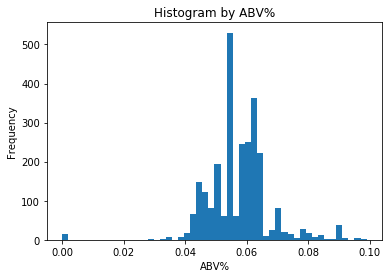

In [16]:
plt.figure()
plt.hist(beers_df['abv'], bins = 50 )
plt.xlabel( 'ABV%' )
plt.ylabel( 'Frequency' )
plt.title( 'Histogram by ABV%' )
#plt.yscale( 'log' )
plt.show()

Text(0.5, 1, 'Pearson Correlation')

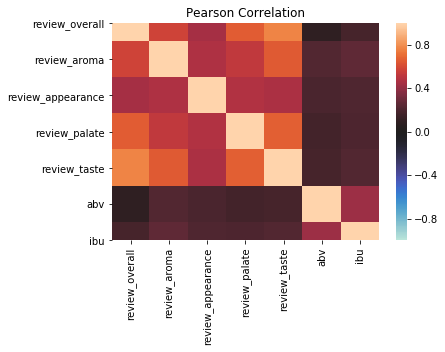

In [17]:
sns.heatmap(df[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'abv', 'ibu', 'style' ]].corr(), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Pearson Correlation' )

Text(0.5, 1, 'Spearman Correlation')

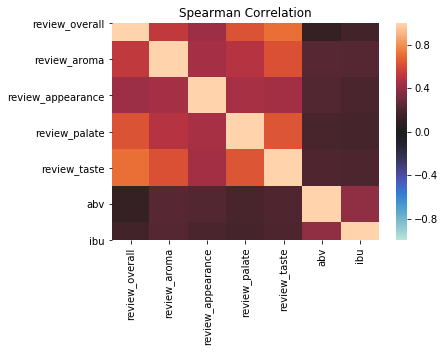

In [18]:
sns.heatmap(df[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'abv', 'ibu', 'style' ]].corr( method = 'spearman' ), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Spearman Correlation' )

In [19]:
df.columns

Index(['brewery_name', 'review_time', 'review_overall', 'review_aroma',
       'review_appearance', 'review_profilename', 'review_palate',
       'review_taste', 'name', 'abv', 'ibu', 'id', 'style', 'ounces'],
      dtype='object')

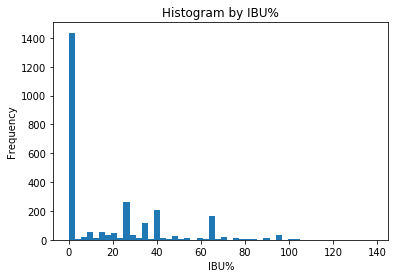

In [20]:
plt.figure()
plt.hist(beers_df['ibu'], bins = 50 )
plt.xlabel( 'IBU%' )
plt.ylabel( 'Frequency' )
plt.title( 'Histogram by IBU%' )
#plt.yscale( 'log' )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15df35c0>,
      dtype=object)

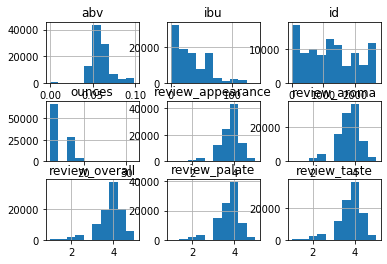

In [21]:
df.hist()

In [22]:
df.columns

Index(['brewery_name', 'review_time', 'review_overall', 'review_aroma',
       'review_appearance', 'review_profilename', 'review_palate',
       'review_taste', 'name', 'abv', 'ibu', 'id', 'style', 'ounces'],
      dtype='object')

In [23]:
df['Ratings_per_user'] = df.groupby('review_profilename')['id'].transform('count')

Text(0.5, 1.0, 'Reviews per user')

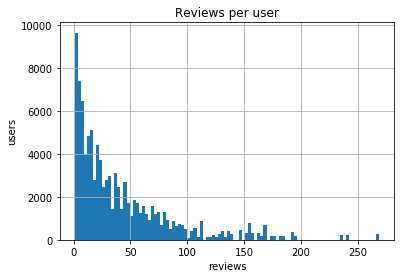

In [24]:
df.Ratings_per_user.hist(bins=100)
plt.xlabel('reviews')
plt.ylabel('users')
plt.title('Reviews per user')

In [29]:
def ci_lower_bound( pos, n ):
    if n == 0:
        return 0
    z = 1.96 # For a IC of 0.95
    phat = 1.0 * pos / n
    return ( phat + ( z ** 2 ) / ( 2 * n ) - z * math.sqrt( ( phat * ( 1 - phat ) + ( z ** 2 ) / ( 4 * n ) ) / n ) ) / ( 1 + ( z ** 2 ) / n )

In [30]:
def agg_reviews( reviews ):
    pos = 0
    for index, review in reviews[ reviews >= 3 ].iteritems():
        pos += review / 5
    #pos = ratings[ ratings >= 3 ].shape[ 0 ]
    return ci_lower_bound( pos, reviews.shape[ 0 ] ) * 5

In [34]:
grouped_beers_df = df.groupby( [ 'name', 'brewery_name', 'style', 'abv', 'ibu' ] ) \
    .agg( { 'review_overall' : agg_reviews, 'review_aroma' : agg_reviews, 'review_appearance' : agg_reviews, 'review_palate' : agg_reviews, 'review_taste'  : agg_reviews, 'review_profilename' : 'count' } ).reset_index() \
    .rename( columns = { 'review_profilename' : 'number_of_reviews' } )

In [37]:
#Top 5 Beers of Reviews
grouped_beers_df.sort_values( by = 'number_of_reviews', ascending = False ).head()

,name,brewery_name,style,abv,ibu,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews
450,Dale's Pale Ale,Oskar Blues Grill & Brew,American Pale Ale (APA),0.065,65.0,3.980082,3.771854,3.887652,3.786932,3.887301,8664
2340,Sierra Nevada Pale Ale,Sierra Nevada Brewing Co.,American Pale Ale (APA),0.056,37.0,4.168838,3.825308,3.928832,3.883933,4.030599,5174
526,Fat Tire Amber Ale,New Belgium Brewing,American Amber / Red Ale,0.052,18.0,3.635017,3.177313,3.616188,3.352656,3.346310,3350
0,#9,Magic Hat Brewing Company,Fruit / Vegetable Beer,0.051,20.0,3.157812,3.051085,3.282271,3.037451,2.976658,2884
1023,Long Hammer IPA,Redhook Ale Brewery,American IPA,0.065,44.0,2.894641,2.539939,2.909310,2.627941,2.492464,2128


In [54]:
grouped_beers_df.loc[ grouped_beers_df[ 'abv' ] > .09 ] \
    .sort_values( by = [ 'abv' ], ascending = False )[ [ 'brewery_name', 'name', 'abv' ] ]

,brewery_name,name,abv
124,Minhas Craft Brewery,Axe Head Malt Liquor,0.099
544,Oskar Blues Grill & Brew,GUBNA Imperial IPA,0.099
2336,Marshall Wharf Brewing Company / Three Tides R...,Sexy Chaos,0.099
13,Surly Brewing Company,Abrasive Ale,0.097
688,21st Amendment Brewery,Hop Crisis,0.097
695,Destihl Restaurant & Brew Works,Hoperation Overload,0.096
2462,The Alchemist Pub & Brewery,The Crusher,0.096
2348,Good People Brewing Company,Snake Handler Double IPA,0.093
466,Aviator Brewing Company,Devils Tramping Ground Tripel,0.092
586,Voodoo Brewing Company,Gran Met,0.092


In [59]:
grouped_beers_df.loc[ grouped_beers_df[ 'ibu' ] > 100 ] \
    .sort_values( by = [ 'ibu' ], ascending = False )[ [ 'brewery_name', 'name', 'ibu' ] ]

,brewery_name,name,ibu
214,Astoria Brewing Company / Wet Dog Cafe,Bitter Bitch Imperial IPA,138.0
2471,Wolf Hills Brewing Company,Troopers Alley IPA,135.0
13,Surly Brewing Company,Abrasive Ale,120.0
651,The Alchemist,Heady Topper,120.0
539,Seven Brides Brewing,Frankenlou's IPA,105.0
601,Flat 12 Bierwerks,Half Cycle IPA,104.0
2348,Good People Brewing Company,Snake Handler Double IPA,103.0
2640,Alameda Brewhouse,Yellow Wolf Imperial IPA,103.0


In [61]:
grouped_beers_df.sort_values( by = 'review_overall', ascending = False ).head( 3 )

,name,brewery_name,style,abv,ibu,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_of_reviews
651,Heady Topper,The Alchemist,American Double / Imperial IPA,0.080,120.0,4.532657,4.571402,4.014500,4.287964,4.513950,938
13,Abrasive Ale,Surly Brewing Company,American Double / Imperial IPA,0.097,120.0,4.273645,4.363197,4.088302,4.133166,4.294979,563
543,Furious,Surly Brewing Company,American IPA,0.062,99.0,4.214230,4.267364,4.167289,4.082763,4.275155,1224


In [65]:
linear_model = LinearRegression( normalize = True )

In [68]:
linear_model.fit( X = df[ [ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ], y = df[ 'review_overall' ] )
preds = linear_model.predict(df[ [ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ] )

In [69]:
linear_model.coef_

array([0.0728146 , 0.05632574, 0.27067864, 0.55199998])

In [74]:
np.sqrt(mean_squared_error(df['review_overall'], preds ) )

0.40413452353634166

In [75]:
# Taste is the most important Beer review

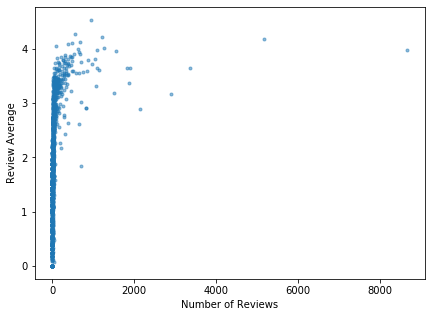

In [78]:
plt.figure( figsize = ( 7, 5 ) )
plt.scatter( grouped_beers_df[ 'number_of_reviews' ], grouped_beers_df[ 'review_overall' ], marker ='.', alpha = .5 )
plt.xlabel( 'Number of Reviews' )
plt.ylabel( 'Review Average' )
plt.show()